In [135]:
import os

In [136]:
os.chdir(r"C:\Users\Herold-J\Documents\GitHub\MacroHistoryProjects")
print("Directory changed") 

Directory changed


In [137]:
# Import some necessary modules and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests


In [138]:
# Download always the newest version to directory

url      = "http://www.macrohistory.net/JST/JSTdatasetR4.xlsx"
r        = requests.get(url, allow_redirects= True)
filename = "JSTdatasetR4.xlsx"
print("Downloading " + filename + " from " + url + " ...")

output   = open('JSTdatasetR4.xlsx', 'wb')
output.write(r.content)
output.close()

# Import data
df       = pd.read_excel("JSTdatasetR4.xlsx",sheet_name = "Data")
df       = df.reset_index()

In [139]:
# User defined-functions
# Function code written by Dominik Wehr, any questions refer to: dominikr.wehr@gmail.com

def windsorize(data,col_name,lb=1,ub=99):
    df_out = data[col_name].copy()
    bounds = [np.percentile(df_out.dropna(),i) for i in [lb,ub]]
    df_out[(df_out < bounds[0]) | (df_out > bounds[1])] = np.nan
    return df_out

In [140]:
def annotate_slope(ds,b,pos):
    d = ds[b].dropna()
    pos_x, pos_y = pos
    coef = np.corrcoef(d[b[0]],d[b[1]])[0,1]
    print("Correlation coefficient is {}".format(coef))
    x0 = pos_x
    y0 = pos_y
    plt_obj = sns.regplot(x = b[0], y = b[1], data= d, scatter=False, color="blue")
    plt_obj.text(x0,y0, str(round(coef,2)),
                    size = 'medium', color='black', weight='semibold')

In [141]:

# Start data preparation

country_list = df["country"].unique() # get list of countries in DataFrame

var_list     = ["cpi","money", "gdp", "thh","tbus","hpnom"] 
grouped      = df.groupby("country")[var_list]

new_vars     = ["inflation","money_growth","gdp_growth","loanHH_growth","loanBus_growth","HPI_growth"]

df[new_vars] = (grouped.diff(1)/grouped.shift(1))*100

# Get rid of outliers

win_lb = 1 # Define lower and upper bound on windsorizing
win_ub = 99

for item in new_vars:
    df[item] = windsorize(df,item,win_lb,win_ub)

Correlation coefficient is 0.5228052689079417
Correlation coefficient is 0.3303979611811145
Correlation coefficient is 0.30207753383715263
Correlation coefficient is 0.362806544043867


Text(35.07872395833333, 0.5, 'CPI Inflation')

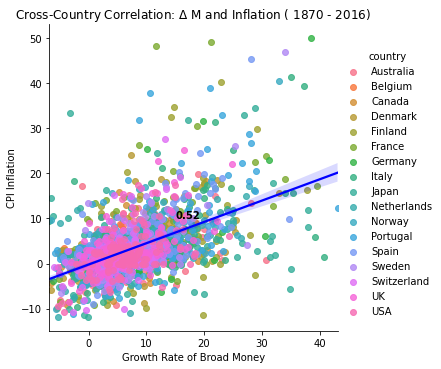

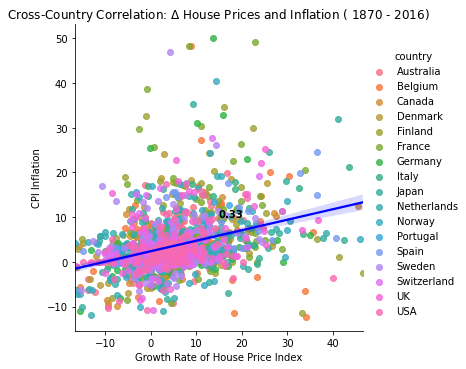

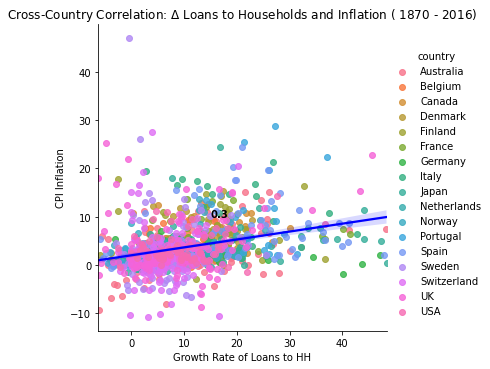

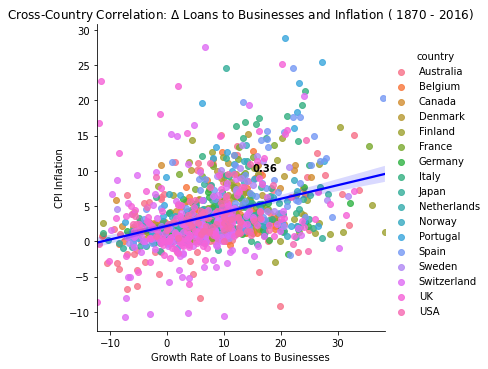

In [142]:
# Plots

#Select plot period 
start = 1870
end   = 2016 
df = df.loc[np.logical_and(df.year >= start,df.year <= end)]

# (1)
sns.lmplot(x = "money_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
annotate_slope(df,["money_growth","inflation"],[15,10])

plt.title('Cross-Country Correlation: $\Delta$ M and Inflation ( '+ str(start) + ' - ' + str(end) + ')')
# Set x-axis label
plt.xlabel('Growth Rate of Broad Money')
# Set y-axis label
plt.ylabel('CPI Inflation')


# (2)

sns.lmplot(x = "HPI_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
annotate_slope(df,["HPI_growth","inflation"],[15,10])

plt.title('Cross-Country Correlation: $\Delta$ House Prices and Inflation ( '+ str(start) + ' - ' + str(end) + ')')
# Set x-axis label
plt.xlabel('Growth Rate of House Price Index')
# Set y-axis label
plt.ylabel('CPI Inflation')

# (3)

sns.lmplot(x = "loanHH_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
annotate_slope(df,["loanHH_growth","inflation"],[15,10])

plt.title('Cross-Country Correlation: $\Delta$ Loans to Households and Inflation ( '+ str(start) + ' - ' + str(end) + ')')
# Set x-axis label
plt.xlabel('Growth Rate of Loans to HH')
# Set y-axis label
plt.ylabel('CPI Inflation')

# (4)
sns.lmplot(x = "loanBus_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
annotate_slope(df,["loanBus_growth","inflation"],[15,10])

plt.title('Cross-Country Correlation: $\Delta$ Loans to Businesses and Inflation ( '+ str(start) + ' - ' + str(end) + ')')
# Set x-axis label
plt.xlabel('Growth Rate of Loans to Businesses')
# Set y-axis label
plt.ylabel('CPI Inflation')